In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
image = cv2.imread("apples.png")
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# here we define the values of hue, saturation and value ranges to experiment with
hue_range = [(0, 10), (0, 20), (170, 180)]
saturation_range = [50, 100, 125, 150]
value_range = [50, 100, 125, 150]
results = []
# here we perform a grid search like to determine the ebst values for upper and lower bounds for
# the filter ( filtre passe bande )
for h in hue_range:
    for s in saturation_range:
        for v in value_range:
            lower_bound = np.array([h[0], s, v])
            upper_bound = np.array([h[1], 255, 255])
            mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
            # we apply opening and clolsing to see the best results
            kernel = np.ones((5, 5), np.uint8)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
            mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
            results.append((lower_bound, upper_bound, mask))

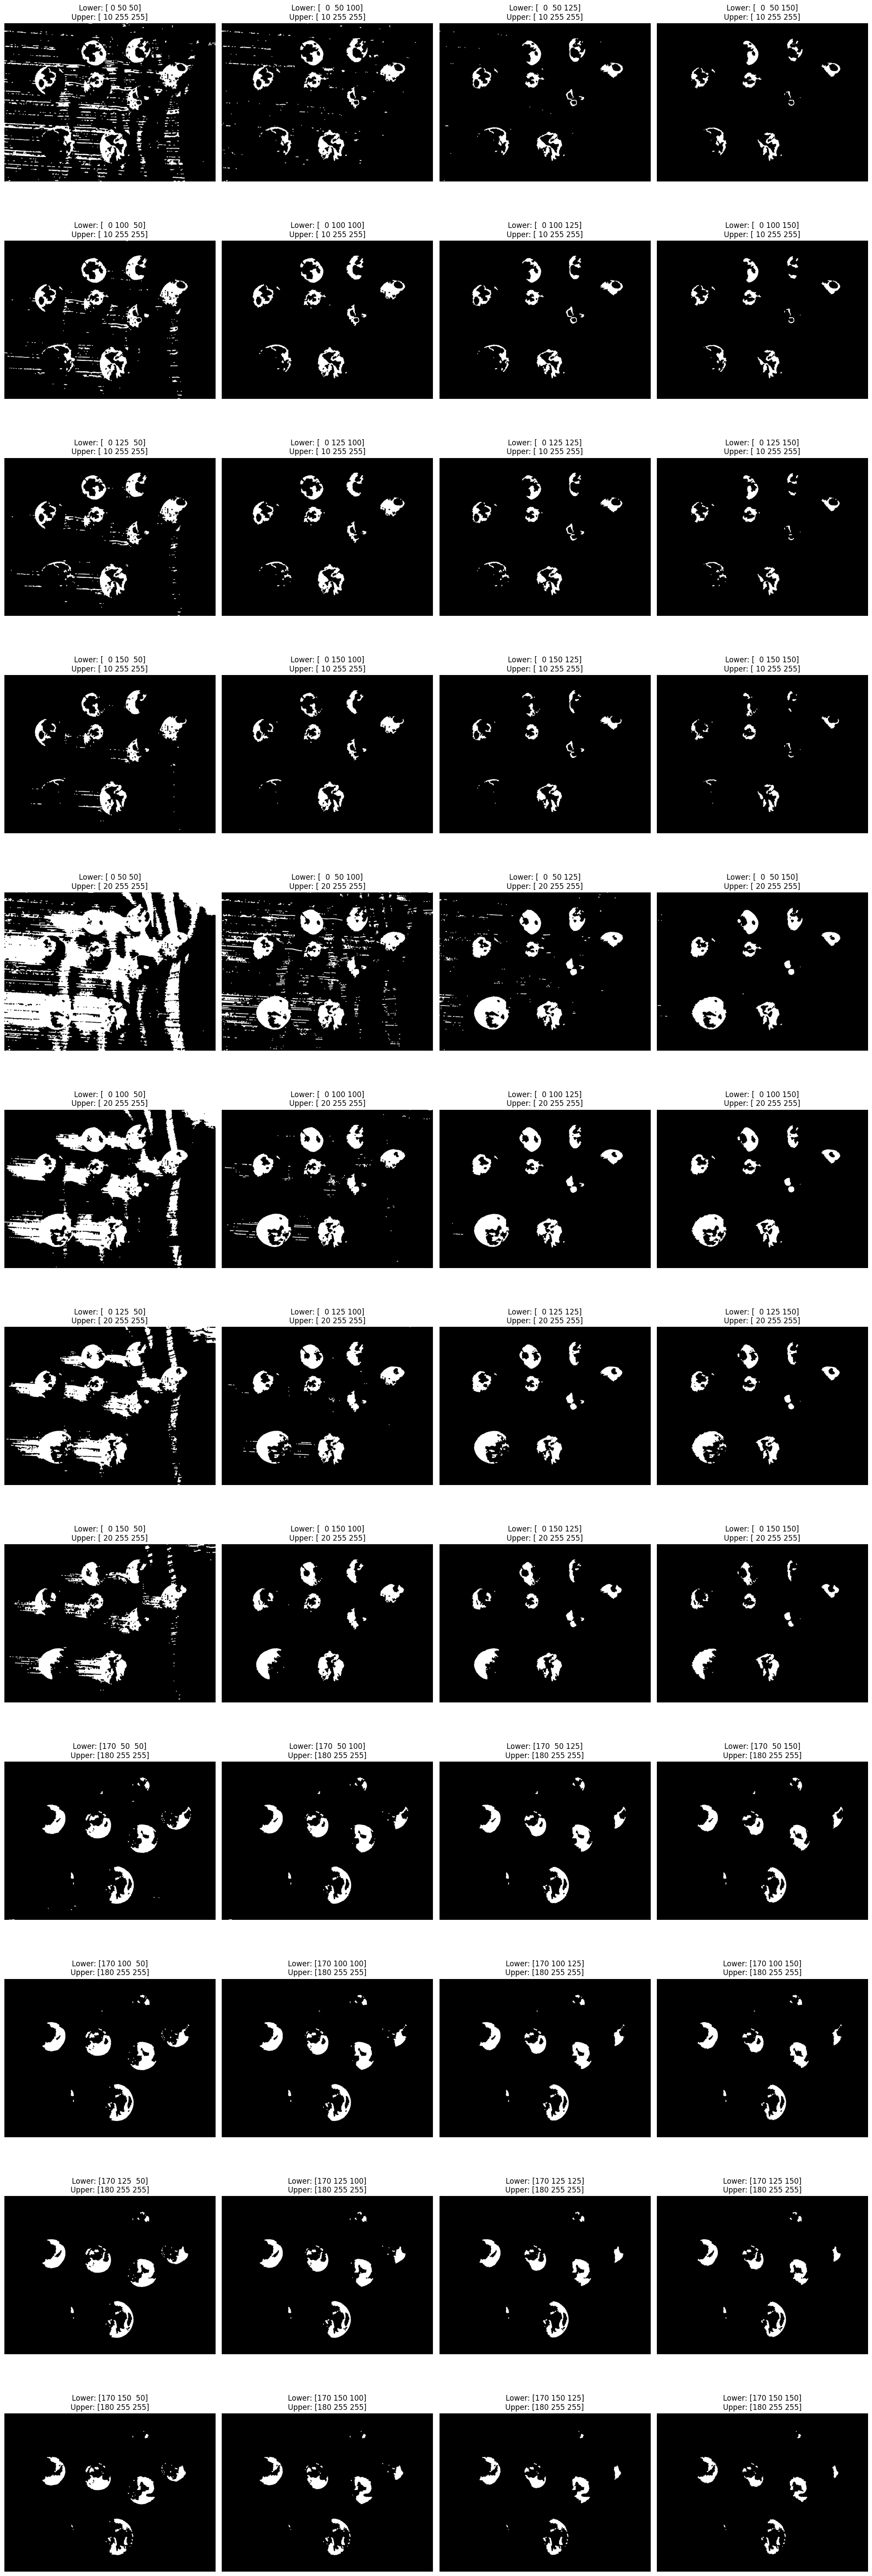

In [7]:
# visualization
num_plots = len(results)
num_cols = 4
num_rows = (num_plots // num_cols) + (num_plots % num_cols != 0)
plt.figure(figsize=(20, num_rows * 5))
for i, (lower_bound, upper_bound, mask) in enumerate(results):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.title(f"Lower: {lower_bound}\nUpper: {upper_bound}")
    plt.axis("off")
    plt.imshow(mask, cmap="gray")

plt.tight_layout()
plt.show()